<a href="https://colab.research.google.com/github/armandossrecife/piloto/blob/main/compara_sas2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies

* [GitPython](https://gitpython.readthedocs.io/en/stable) - to clone git repositories
* [CLOC](https://github.com/AlDanial/cloc) - to calculate CLOC and other source code metrics





In [1]:
!pip3 install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [2]:
!sudo apt install cloc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libalgorithm-diff-perl libalgorithm-diff-xs-perl libb-hooks-endofscope-perl
  libb-hooks-op-check-perl libclass-method-modifiers-perl
  libclass-xsaccessor-perl libdevel-callchecker-perl
  libdynaloader-functions-perl libimport-into-perl
  libmodule-implementation-perl libmodule-runtime-perl libmoo-perl
  libnamespace-clean-perl libpackage-stash-perl libpackage-stash-xs-perl
  libparallel-forkmanager-perl libparams-classify-perl libregexp-common-perl
  librole-tiny-perl libsub-exporter-progressive-perl libsub-identify-perl
  libsub-name-perl libsub-quote-perl libtry-tiny-perl libvariable-magic-perl
Suggested packages:
  libscalar-number-perl
The following NEW packages will be installed:
  cloc libalgorithm-diff-perl libalgorithm-diff-xs-perl
  libb-hooks-endofscope-perl libb-hooks-op-check-perl
  libclass-method-modifiers-perl libclass-

# 2. Dataset do Darius Sas

On the relation between architectural smells and source code changes - https://onlinelibrary.wiley.com/doi/full/10.1002/smr.2398

replication kit - https://zenodo.org/record/4459015

In [3]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/my_repositories.csv

--2023-08-25 12:30:39--  https://raw.githubusercontent.com/armandossrecife/teste/main/my_repositories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1574 (1.5K) [text/plain]
Saving to: ‘my_repositories.csv’

my_repositories.csv 100%[===================>]   1.54K  --.-KB/s    in 0s      

2023-08-25 12:30:39 (12.6 MB/s) - ‘my_repositories.csv’ saved [1574/1574]



## 2.1 Replication Kit data and scripts

In [4]:
!wget https://zenodo.org/record/4459015/files/replication-package.zip

--2023-08-25 12:30:40--  https://zenodo.org/record/4459015/files/replication-package.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95506210 (91M) [application/octet-stream]
Saving to: ‘replication-package.zip’

replication-package 100%[===================>]  91.08M  2.60MB/s    in 91s     

2023-08-25 12:32:14 (1020 KB/s) - ‘replication-package.zip’ saved [95506210/95506210]



In [5]:
!unzip replication-package.zip

Archive:  replication-package.zip
   creating: replication-package/
   creating: replication-package/csv-2019-12-09/
  inflating: replication-package/csv-2019-12-09/projects.csv  
  inflating: replication-package/csv-2019-12-09/components.csv  
  inflating: replication-package/csv-2019-12-09/affected.csv  
  inflating: replication-package/csv-2019-12-09/smells.csv  
  inflating: replication-package/protocol.pdf  
   creating: replication-package/plots/
  inflating: replication-package/plots/aux-loc-boxplot-individual-project.png  
  inflating: replication-package/plots/aux-avrg-change-by-age-all.png  
  inflating: replication-package/plots/aux-loc-density-individual-project.png  
  inflating: replication-package/plots/aux-nsmell-locgroup-individual-project.png  
  inflating: replication-package/plots/aux-smell-count-individual-project.png  
  inflating: replication-package/plots/rq1b-changeFreq-nsmells-loess.png  
  inflating: replication-package/plots/rq1b-changeSize-nsmells-loess.png

In [6]:
import pandas as pd

df_smells = pd.read_csv('replication-package/csv-2019-12-09/smells.csv')
df_projects = pd.read_csv('replication-package/csv-2019-12-09/projects.csv')
df_components = pd.read_csv('replication-package/csv-2019-12-09/components.csv')
df_affected = pd.read_csv('replication-package/csv-2019-12-09/affected.csv')

<ipython-input-6-3284ae094b4a>:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_components = pd.read_csv('replication-package/csv-2019-12-09/components.csv')


## 2.2 Architectural Smells

1. Dataset with architectural smells

In [7]:
df_smells.head(3)

,project,age,firstAppeared,lastDetected,smellType,uniqueSmellID,version,versionIndex,versionDate.x,smellIdInVersion,...,shape,size,strength,affectedElements,firstAppearedIndex,lastDetectedIndex,versionDate.y,nPackages,nClasses,pageRankWeighted
0,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,5-917399157ace8ae691164d44db8eec3953b205f7,5,19-2-2012,135496,...,NaN,4,0.05,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,19-2-2012,97,1937,0.084671
1,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,77-646b059eb0b2de3bffe329d744c47bd9890103c7,77,17-11-2017,1024721,...,NaN,5,0.00,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,17-11-2017,74,2812,0.039795
2,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,94-9aae33bbf39098c8aa601c040754cf36bfbdf1d4,94,9-4-2019,1508745,...,NaN,5,0.00,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,9-4-2019,76,2833,0.045560


In [8]:
df_smells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271739 entries, 0 to 271738
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   project                  271739 non-null  object 
 1   age                      271739 non-null  int64  
 2   firstAppeared            271739 non-null  object 
 3   lastDetected             271739 non-null  object 
 4   smellType                271739 non-null  object 
 5   uniqueSmellID            271739 non-null  int64  
 6   version                  271739 non-null  object 
 7   versionIndex             271739 non-null  int64  
 8   versionDate.x            271739 non-null  object 
 9   smellIdInVersion         271739 non-null  int64  
 10  affectedClassesRatio     8674 non-null    float64
 11  affectedComponentType    271739 non-null  object 
 12  affectedDesignLevel      207182 non-null  object 
 13  afferentAffectedRatio    8674 non-null    float64
 14  avrg

2. Projects (repositories) with identified Architectural Smells

In [9]:
df_smells['project'].unique()

array(['accumulo', 'activemq', 'ant-ivy', 'cassandra', 'chukwa', 'druid',
       'guava', 'httpcomponents-client', 'jackrabbit', 'jackson-databind',
       'jena', 'jspwiki', 'lucene-solr', 'mina', 'pdfbox', 'pgjdbc',
       'poi', 'struts', 'testng', 'tika', 'xerces2-j'], dtype=object)

In [10]:
qty_complete_repositories_as = len(df_smells['project'].unique())
print(f"Amount of repositories with complete (AS) data {qty_complete_repositories_as}")

Amount of repositories with complete (AS) data 21


In [11]:
for each in df_smells['project'].unique():
  print(each)

accumulo
activemq
ant-ivy
cassandra
chukwa
druid
guava
httpcomponents-client
jackrabbit
jackson-databind
jena
jspwiki
lucene-solr
mina
pdfbox
pgjdbc
poi
struts
testng
tika
xerces2-j


3. Types of Architectural Smells identified

In [12]:
df_smells.smellType.unique()

array(['unstableDep', 'cyclicDep', 'hubLikeDep', 'godComponent'],
      dtype=object)

In [13]:
for each in df_smells.smellType.unique():
  print(each)

unstableDep
cyclicDep
hubLikeDep
godComponent


4. Types of Components Affected by Architectural Smells

In [14]:
df_smells.affectedComponentType.unique()

array(['package', 'class'], dtype=object)

In [15]:
for each in df_smells.affectedComponentType.unique():
  print(each)

package
class


5. Classes affected by Architectural Smells

In [16]:
df_smells_classes_affected = df_smells.query("affectedComponentType=='class'")
df_smells_classes_affected[['project', 'smellType', 'affectedComponentType', 'affectedElements']]

,project,smellType,affectedComponentType,affectedElements
124,accumulo,cyclicDep,class,"[parser.TreeNode, parser.TreeNode$PostorderEnu..."
327,accumulo,cyclicDep,class,[org.apache.accumulo.core.security.tokens.Kerb...
678,accumulo,cyclicDep,class,[org.apache.accumulo.core.security.tokens.User...
1359,accumulo,cyclicDep,class,[org.apache.accumulo.core.client.summary.Summa...
1360,accumulo,cyclicDep,class,[org.apache.accumulo.core.client.summary.Summa...
...,...,...,...,...
271712,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."
271713,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."
271714,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."
271715,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."


### Cassandra classes affected by Archictural Smells

In [17]:
df_cassandra_smells_classes_affected = df_smells_classes_affected.query("project=='cassandra'")
df_cassandra_smells_classes_affected[['affectedElements']]

,affectedElements
50351,"[org.apache.cassandra.db.ColumnFamily, org.apa..."
50352,"[org.apache.cassandra.db.ColumnFamily, org.apa..."
50359,"[org.apache.cassandra.db.Keyspace, org.apache...."
50360,"[org.apache.cassandra.db.Keyspace, org.apache...."
50361,"[org.apache.cassandra.db.Keyspace, org.apache...."
...,...
91854,"[org.apache.cassandra.config.CFMetaData, org.a..."
91855,"[org.apache.cassandra.config.CFMetaData, org.a..."
91893,"[org.apache.cassandra.db.Mutation, org.apache...."
91894,"[org.apache.cassandra.db.Mutation, org.apache...."


### ActiveMQ Classes Affected by Architectural Smells

In [18]:
df_activemq_smells_classes_affected = df_smells_classes_affected.query("project=='activemq'")
df_activemq_smells_classes_affected[['affectedElements']]

,affectedElements
8088,"[org.apache.activemq.ActiveMQConnection, org.a..."
8089,"[org.apache.activemq.ActiveMQConnection, org.a..."
8090,"[org.apache.activemq.ActiveMQConnection, org.a..."
8091,"[org.apache.activemq.ActiveMQConnection, org.a..."
8092,"[org.apache.activemq.ActiveMQConnection, org.a..."
...,...
33702,"[org.apache.activemq.ActiveMQConnection, org.a..."
33734,"[org.apache.activemq.broker.BrokerService, org..."
33735,"[org.apache.activemq.broker.BrokerService, org..."
33736,"[org.apache.activemq.broker.BrokerService, org..."


### Guava classes affected by Architectural Smells

In [19]:
#guava
df_guava_smells_classes_affected = df_smells_classes_affected.query("project=='guava'")
df_guava_smells_classes_affected[['affectedElements']]

,affectedElements
100576,"[com.google.common.base.CharMatcher, com.googl..."
100577,"[com.google.common.base.CharMatcher, com.googl..."
100578,"[com.google.common.base.CharMatcher, com.googl..."
100579,"[com.google.common.base.CharMatcher, com.googl..."
100580,"[com.google.common.base.CharMatcher, com.googl..."
...,...
105088,"[com.google.common.collect.ImmutableTable, com..."
105089,"[com.google.common.collect.ImmutableTable, com..."
105090,"[com.google.common.collect.ImmutableTable, com..."
105091,"[com.google.common.collect.ImmutableTable, com..."


## 2.3 Projects (repositories)

In [20]:
df_projects.head(3)

,project,version,versionDate,versionIndex,nPackages,nClasses
0,accumulo,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,28-10-2011,1,85,1596
1,accumulo,3-968ad7fe2efbdcf9bfcd77be1b8b47d340aee99e,23-12-2011,3,109,2031
2,accumulo,4-6d8d0acc548a79ce1e6fbe15dc9c0dabd646c6ca,20-1-2012,4,96,1931


In [21]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   project       3087 non-null   object
 1   version       3087 non-null   object
 2   versionDate   3087 non-null   object
 3   versionIndex  3087 non-null   int64 
 4   nPackages     3087 non-null   int64 
 5   nClasses      3087 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 144.8+ KB


## 2.4 Components

In [22]:
df_components.head()

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
0,accumulo,org.apache.accumulo.core.master.thrift.MasterC...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,47,0,0.0,0,0.0,0
1,accumulo,org.apache.accumulo.core.file.BloomFilterLayer...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,94,0,0.0,0,0.0,0
2,accumulo,org.apache.accumulo.core.client.impl.TabletLoc...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,36,0,0.0,0,0.0,0
3,accumulo,org.apache.accumulo.server.constraints.Metadat...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,196,0,0.0,0,0.0,0
4,accumulo,org.apache.accumulo.core.tabletserver.thrift.M...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,41,0,0.0,0,0.0,0


In [23]:
df_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881915 entries, 0 to 3881914
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   project                  object 
 1   name                     object 
 2   type                     object 
 3   version                  object 
 4   versionIndex             int64  
 5   numOfClassesInPackage    int64  
 6   linesOfCode              int64  
 7   freqOfChanges            int64  
 8   percCommitsClassChanged  float64
 9   changeHasOccurredMetric  object 
 10  percCommitsPackChanged   float64
 11  totalAmountOfChanges     int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 355.4+ MB


In [24]:
df_components.project.unique()

array(['accumulo', 'activemq', 'ant-ivy', 'cassandra', 'chukwa', 'druid',
       'guava', 'httpcomponents-client', 'jackrabbit', 'jackson-databind',
       'jena', 'jspwiki', 'lucene-solr', 'mina', 'pdfbox', 'pgjdbc',
       'poi', 'struts', 'testng', 'tika', 'xerces2-j'], dtype=object)

### Cassandra Components

In [25]:
df_cassandra_classes = df_components.query("type=='class' and project=='cassandra'")
df_cassandra_classes

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
732432,cassandra,org.apache.cassandra.service.Cassandra$getStri...,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,105,0,0.000000,0,0.0,0
732434,cassandra,org.apache.cassandra.locator.RackAwareStrategy,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,127,0,0.000000,0,0.0,0
732435,cassandra,org.apache.cassandra.io.FastBufferedInputStream,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,163,0,0.000000,0,0.0,0
732436,cassandra,org.apache.cassandra.db.ColumnFactory,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,13,0,0.000000,0,0.0,0
732437,cassandra,org.apache.cassandra.io.SSTable,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,598,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1018985,cassandra,org.apache.cassandra.tools.nodetool.RefreshSiz...,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,6,2,1.459854,false,0.0,0
1018986,cassandra,org.apache.cassandra.metrics.ClientMetrics,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,16,7,5.109489,false,0.0,0
1018987,cassandra,org.apache.cassandra.metrics.CompactionMetrics$3,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,8,6,4.379562,false,0.0,0
1018988,cassandra,org.apache.cassandra.utils.MerkleTree$OffHeapI...,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,62,1,0.729927,false,0.0,0


### ActiveMQ Components

In [26]:
df_activemq_classes = df_components.query("type=='class' and project=='activemq'")
df_activemq_classes

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
244936,activemq,org.activemq.sampler.Producer,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,326,0,0.000000,0,0.0,0
244937,activemq,org.activemq.openwire.v1.ActiveMQTempQueueMars...,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,17,0,0.000000,0,0.0,0
244938,activemq,org.activemq.util.Callback,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,2,0,0.000000,0,0.0,0
244939,activemq,org.apache.activeio.xnet.ServiceDaemon,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,125,0,0.000000,0,0.0,0
244940,activemq,org.activemq.transport.stomp.Disconnect,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,6,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
653590,activemq,org.apache.activemq.openwire.v5.ExceptionRespo...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,33,3,1.851852,false,0.0,0
653591,activemq,org.apache.activemq.xbean.BrokerFactoryBean$1,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,4,4,2.469136,false,0.0,0
653592,activemq,org.apache.activemq.openwire.v2.ReplayCommandM...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,36,6,3.703704,false,0.0,0
653593,activemq,org.apache.activemq.openwire.v5.DiscoveryEvent...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,38,3,1.851852,false,0.0,0


### Guava Components

In [27]:
df_guava_classes = df_components.query("type=='class' and project=='guava'")
df_guava_classes

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
1157019,guava,com.google.common.util.concurrent.Futures,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,229,0,0.000000,0,0.0,0
1157020,guava,com.google.common.io.OutputSupplier,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,2,0,0.000000,0,0.0,0
1157021,guava,com.google.common.base.Splitter$2$1,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,18,0,0.000000,0,0.0,0
1157022,guava,com.google.common.base.CharMatcher$13,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,14,0,0.000000,0,0.0,0
1157023,guava,com.google.common.base.Defaults,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,21,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1275567,guava,com.google.common.primitives.Booleans,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,285,3,3.488372,false,0.0,0
1275568,guava,com.google.common.util.concurrent.Striped$5,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,5,5,5.813953,false,0.0,0
1275569,guava,com.google.common.hash.PrimitiveSink,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,16,3,3.488372,false,0.0,0
1275570,guava,com.google.common.util.concurrent.AbstractServ...,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,9,5,5.813953,false,0.0,0


## 2.5 Affected

In [28]:
df_affected.head()

,project,name,type,version,affectedByUniqueSmellId
0,accumulo,org.apache.accumulo.core.file,package,40-58af0ce9f04cb1efa59f69c8abdeb87e3c73504c,7
1,accumulo,org.apache.accumulo.core.file,package,38-59875c298617221282825fb870dbe7abb86ea4c4,1
2,accumulo,org.apache.accumulo.core.file,package,8-1e1cc2484e61e1de17ecabc6d7fb46131eece2e8,7
3,accumulo,org.apache.accumulo.core.file,package,74-82a15686893cc2f1b26777664093fa1ac312248a,1113
4,accumulo,org.apache.accumulo.core.file,package,97-436f404e247114737eb6a499799cf90f1a201620,1534


In [29]:
df_affected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836160 entries, 0 to 1836159
Data columns (total 5 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   project                  object
 1   name                     object
 2   type                     object
 3   version                  object
 4   affectedByUniqueSmellId  int64 
dtypes: int64(1), object(4)
memory usage: 70.0+ MB


In [30]:
df_affected.project.unique()

array(['accumulo', 'activemq', 'ant-ivy', 'cassandra', 'chukwa', 'druid',
       'guava', 'httpcomponents-client', 'jackrabbit', 'jackson-databind',
       'jena', 'jspwiki', 'lucene-solr', 'mina', 'pdfbox', 'pgjdbc',
       'poi', 'struts', 'testng', 'tika', 'xerces2-j'], dtype=object)

### Cassandra components affected by AS

In [31]:
df_cassandra_classes_affected_by_as = df_affected.query("type=='class' and project=='cassandra'")
df_cassandra_classes_affected_by_as

,project,name,type,version,affectedByUniqueSmellId
330300,cassandra,org.apache.cassandra.db.CommitLog,class,7-64c38a2657ae363b22dcbf9bf3ea0b518d75681d,55
330301,cassandra,org.apache.cassandra.db.CommitLog,class,2-50c1987265f8ddaf5032a7ace07b2462aba4f09b,59
330302,cassandra,org.apache.cassandra.db.CommitLog,class,2-50c1987265f8ddaf5032a7ace07b2462aba4f09b,54
330303,cassandra,org.apache.cassandra.db.CommitLog,class,8-92098fe695dc054d9c6706ae873d68d72947d01f,107
330304,cassandra,org.apache.cassandra.db.CommitLog,class,19-27f6691ca35f52ea8b0853dd1bf18b67e89f5fc9,327
...,...,...,...,...,...
793367,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,132-6b9575af7e244efe98943e5e7f92b33e252218a3,6343
793368,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,125-801cb70ee811c956e987718a00695638d5bec1b6,17053
793369,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,121-13150b001a8ddf82a77ac9525c446b7e9e32325c,17053
793370,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,131-3a87604e4c83939f05d1a51e577e69d45dc7345d,17053


### ActiveMQ components affected by AS

In [32]:
df_activemq_classes_affected_by_as = df_affected.query("type=='class' and project=='activemq'")
df_activemq_classes_affected_by_as

,project,name,type,version,affectedByUniqueSmellId
39480,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,30
39481,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,49
39482,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,31
39483,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,47
39484,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,50
...,...,...,...,...,...
204046,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,5661
204047,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,162-cee7f014fa4afca04681066946e5a2b6811141af,5661
204048,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,145-88efa01e119197fb043a890c54ddb37abce21ff4,5661
204049,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,126-5d353e241b0ba76ad1a0b42ef5c7a2ae54106860,4794


### Guava components affected by AS

In [33]:
df_guava_classes_affected_by_as = df_affected.query("type=='class' and project=='guava'")
df_guava_classes_affected_by_as

,project,name,type,version,affectedByUniqueSmellId
830686,guava,com.google.common.base.CharMatcher$Or,class,6-970ad12d61e18d5171f3a5e8e3d07c83f587d2ed,1
830687,guava,com.google.common.base.CharMatcher$Or,class,33-c523556ab7d0f05afadebd20e7768d4c16af8771,64
830688,guava,com.google.common.base.CharMatcher$Or,class,82-cb3a29fb67936c2bc52b1cfee08cedab62950282,146
830689,guava,com.google.common.base.CharMatcher$Or,class,9-803f44ac9c6a3457388394e952132fe18449cb9f,1
830690,guava,com.google.common.base.CharMatcher$Or,class,10-7d4849b19bb33ab4ad6c442a501f019b7dc00d89,1
...,...,...,...,...,...
843134,guava,com.google.common.io.BaseEncoding,class,113-23e4ad3ee650aa2954a7c9c5e60410de9cb342c9,99
843135,guava,com.google.common.io.BaseEncoding,class,75-b281c1fd5a960abf179fe8f4f280daca47ff2156,99
843136,guava,com.google.common.io.BaseEncoding,class,75-b281c1fd5a960abf179fe8f4f280daca47ff2156,135
843137,guava,com.google.common.io.BaseEncoding,class,72-82810968135e9ac4c9120f44b0936d478492066e,99


# 3. Details of the analyzed projects

Selection criteria:

* Project lifetime (in years)
* number of commits
* Number of released releases
* Number of files
* Number of .java files
* Number of participants (contributors)
* Relevance in the open-source community
** Amount of stars

In [34]:
repository_project_list = ['cassandra', 'activemq', 'guava']
repository_project_list

['cassandra', 'activemq', 'guava']

### Support classes to CLOC

In [35]:
import os
import subprocess
import json
import pandas as pd
import requests
import threading
import datetime
from git import Repo
import csv

class DirectoryAnalyzer:
    def __init__(self, target_directory, cloc_output_file="cloc_output.json"):
        self.target_directory = target_directory
        self.cloc_output_file = cloc_output_file

    def cloc(self):
        os.chdir(self.target_directory)
        try:
            # Run CLOC to analyze the repository and save the output as JSON
            subprocess.run(["cloc", "--json","."], stdout=open(self.cloc_output_file, "w"))
        except Exception as ex:
            print(f'Error: {str(ex)}')


        # Load JSON output from CLOC
        with open(self.cloc_output_file, "r") as json_file:
            cloc_data = json.load(json_file)

        # Extract desired metrics for Java files
        java_metrics = cloc_data.get("Java", {})
        self.total_unique_files = java_metrics.get("nFiles", 0)
        self.total_blank_loc = java_metrics.get("blank", 0)
        self.total_comment_loc = java_metrics.get("comment", 0)
        self.total_loc = java_metrics.get("code", 0)

        sum_metrics = cloc_data.get("SUM", {})
        self.total_nFiles = sum_metrics.get("nFiles",0)
        self.total_LOC_files = sum_metrics.get("code",0)

        return self.total_nFiles, self.total_unique_files, self.total_blank_loc, self.total_comment_loc, self.total_loc, self.total_LOC_files

class RepositoryAnalyzer:
    def __init__(self, target_directory):
        self.target_directory = target_directory

    def get_first_commit_date(self):
        command = ["git", "log", "--reverse", "--format=%ad", "--date=short"]
        result = subprocess.run(command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        self.first_commit_date = result.stdout.splitlines()[0]
        return self.first_commit_date

    def get_last_commit_date(self):
        command = ["git", "log", "-1", "--format=%ad", "--date=short"]
        result = subprocess.run(command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        self.last_commit_date = result.stdout.strip()
        return self.last_commit_date

    def get_total_commit_count(self):
        command = ["git", "rev-list", "--count", "HEAD"]
        result = subprocess.run(command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        self.total_commit_count = int(result.stdout.strip())
        return self.total_commit_count

    def get_total_release_count(self):
        git_tag_command = ["git", "tag"]
        wc_command = ["wc", "-l"]

        git_tag_result = subprocess.run(git_tag_command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        wc_result = subprocess.run(wc_command, input=git_tag_result.stdout, stdout=subprocess.PIPE, text=True)

        self.total_release_count = int(wc_result.stdout.strip())
        return self.total_release_count

def get_repository_name(url):
  repository_name = os.path.splitext(os.path.basename(url))[0]
  return repository_name

def clone_repository(url):
  target_directory = get_repository_name(url)
  subprocess.run(["git", "clone", url, target_directory])

def gera_my_dict(url, total_nFiles, total_unique_files, total_blank_loc, total_comment_loc, total_loc, total_LOC_files):
    name = get_repository_name(url)
    repository_path = '/content/'+name
    git_repo_analyzer = RepositoryAnalyzer(target_directory=repository_path)
    first_commit_date = git_repo_analyzer.get_first_commit_date()
    last_commit_date = git_repo_analyzer.get_last_commit_date()
    total_commit_count = git_repo_analyzer.get_total_commit_count()
    total_release_count = git_repo_analyzer.get_total_release_count()

    my_dict = {
        'name': [name],
        'files': [total_nFiles],
        'java': [total_unique_files],
        'blank_loc_java': [total_blank_loc],
        'comment_loc_java': [total_comment_loc],
        'loc_java': [total_loc],
        'loc_files': [total_LOC_files],
        'first_commit_date':[first_commit_date],
        'last_commit_date':[last_commit_date],
        'total_commit_count':[total_commit_count],
        'total_release_count':[total_release_count]
    }
    return my_dict

def gera_csv(url, my_dict):
  name = get_repository_name(url)
  my_df = pd.DataFrame.from_dict(my_dict)
  name = name + '.csv'
  name = '/content/'+name
  my_df.to_csv(name, index=False)
  return my_df

class RepoCloner:
    def __init__(self, qtd_repositorios, lista_urls):
        self.qtd_repositorios = qtd_repositorios
        self.lista_urls = lista_urls
        self.lista_threads = []
        self.lista_tempo_inicio = []
        self.lista_tempo_conclusao = []

    def my_clone(self, git_url, repo_dir):
        try:
            Repo.clone_from(git_url, repo_dir)
            tempo = datetime.datetime.now()
            print(f'Clonagem do repo {git_url} concluída com sucesso! -> instante: {tempo}')
            elemento = (repo_dir, tempo)
            self.lista_tempo_conclusao.append(elemento)
        except Exception as ex:
            print(f"Erro ao clonar o repo: {git_url} - {str(ex)}")

    def clona_repositorios(self):
        try:
          for i in range(self.qtd_repositorios):
              nome = get_repository_name(url=self.lista_urls[i])
              tdi = threading.Thread(target=self.my_clone, args=(self.lista_urls[i], nome))
              tdi.name = 'Thread-'+str(i+1)
              inicio_thread = datetime.datetime.now()
              print(f"Thread {i+1} iniciada em {inicio_thread} - clonando {nome}:{self.lista_urls[i]}...")
              self.lista_threads.append(tdi)
              elemento = (nome, inicio_thread)
              self.lista_tempo_inicio.append(elemento)
              tdi.start()

          for each in self.lista_threads:
              each.join()
        except Exception as ex:
          print(f'Erro no clona_repositorio: {str(ex)}')

    def mostra_tempo_clonagens(self):
        for t1 in self.lista_tempo_inicio:
            for t2 in self.lista_tempo_conclusao:
                if t1[0] == t2[0]:
                    print(f"Tempo de clonagem do {t1[0]} é: {t2[1]-t1[1]} s")

class CSVFile:
    def __init__(self, file_path):
        self.file_path = file_path

    def read(self):
        with open(self.file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                yield row

class CSVCombiner:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.accumulated_content = []

    def combine(self):
        for filename in os.listdir(self.folder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(self.folder_path, filename)
                csv_file = CSVFile(file_path)
                for row in csv_file.read():
                  if 'name' not in row and 'lucene-solr' not in row and 'jackson' not in row:
                      self.accumulated_content.append(row)

    def write(self, output_file_path):
        with open(output_file_path, 'w', newline='') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerows(self.accumulated_content)

class CSVModifier:
    def __init__(self, csv_file):
        self.csv_file = csv_file

    def insert_new_line(self, new_line):
        existing_content = []
        with open(self.csv_file.file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                existing_content.append(row)

        existing_content.insert(0, new_line)

        with open(self.csv_file.file_path, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(existing_content)

### List the repositories for analysis

In [38]:
lista_repositorios = ['https://github.com/apache/cassandra.git', 'https://github.com/apache/activemq.git', 'https://github.com/google/guava.git']
print(lista_repositorios)

['https://github.com/apache/cassandra.git', 'https://github.com/apache/activemq.git', 'https://github.com/google/guava.git']


### Clone repositories locally


In [39]:
qtd_repositorios = len(lista_repositorios)
print(f'Clonando os {qtd_repositorios} repositórios. Aguarde...')
cloner = RepoCloner(qtd_repositorios=len(lista_repositorios), lista_urls=lista_repositorios)
cloner.clona_repositorios()
cloner.mostra_tempo_clonagens()
print(f'Clonagem de todos os {qtd_repositorios} concluída com sucesso!')

Clonando os 3 repositórios. Aguarde...
Thread 1 iniciada em 2023-08-25 12:42:07.452915 - clonando cassandra:https://github.com/apache/cassandra.git...
Thread 2 iniciada em 2023-08-25 12:42:07.453778 - clonando activemq:https://github.com/apache/activemq.git...
Thread 3 iniciada em 2023-08-25 12:42:07.461710 - clonando guava:https://github.com/google/guava.git...
Clonagem do repo https://github.com/apache/activemq.git concluída com sucesso! -> instante: 2023-08-25 12:42:33.615969
Clonagem do repo https://github.com/apache/cassandra.git concluída com sucesso! -> instante: 2023-08-25 12:43:48.195951
Clonagem do repo https://github.com/google/guava.git concluída com sucesso! -> instante: 2023-08-25 12:44:15.977488
Tempo de clonagem do cassandra é: 0:01:40.743036 s
Tempo de clonagem do activemq é: 0:00:26.162191 s
Tempo de clonagem do guava é: 0:02:08.515778 s
Clonagem de todos os 3 concluída com sucesso!


### Analyzes CLOC and other metrics for each cloned repository

In [40]:
for each in lista_repositorios:
  try:
    URL_REPOSITORY = each
    target_directory = get_repository_name(url=URL_REPOSITORY)
    target_directory = '/content/'+target_directory
    json_file = target_directory + '.json'

    print(f'Analise CLOC diretório: {target_directory}')
    directory_analyzer = DirectoryAnalyzer(target_directory=target_directory, cloc_output_file=json_file)
    total_nFiles, total_unique_files, total_blank_loc, total_comment_loc, total_java_loc, total_files_loc = directory_analyzer.cloc()

    my_dict=gera_my_dict(URL_REPOSITORY,total_nFiles, total_unique_files, total_blank_loc, total_comment_loc, total_java_loc, total_files_loc)

    print(f'Gera o .csv do {URL_REPOSITORY}')
    gera_csv(URL_REPOSITORY,my_dict)
  except Exception as ex:
    print(f'Erro ao fazer a análise CLOC do repositório {each}')

Analise CLOC diretório: /content/cassandra
Gera o .csv do https://github.com/apache/cassandra.git
Analise CLOC diretório: /content/activemq
Gera o .csv do https://github.com/apache/activemq.git
Analise CLOC diretório: /content/guava
Gera o .csv do https://github.com/google/guava.git


In [41]:
!rm -rf /content/temp  && mkdir /content/temp
!cp /content/*.csv /content/temp
!rm /content/temp/my_repositories.csv

In [42]:
!ls -liath /content/temp

total 20K
6432766 drwxr-xr-x 2 root root 4.0K Aug 25 13:05 .
6432767 -rw-r--r-- 1 root root  219 Aug 25 13:05 activemq.csv
6432768 -rw-r--r-- 1 root root  222 Aug 25 13:05 cassandra.csv
6432769 -rw-r--r-- 1 root root  215 Aug 25 13:05 guava.csv
2359302 drwxr-xr-x 1 root root 4.0K Aug 25 13:05 ..


### Merge all .csv

In [43]:
folder_path = '/content/temp'
output_file_path = '/content/temp/combined.csv'
csv_combiner = CSVCombiner(folder_path)
csv_combiner.combine()
csv_combiner.write(output_file_path)

csv_file_path = '/content/temp/combined.csv'
new_line = ['name','files','java','blank_loc_java','comment_loc_java','loc_java','loc_files','commit_inicial','commit_final','qtd_commits','qtd_releases']
csv_file = CSVFile(csv_file_path)
csv_modifier = CSVModifier(csv_file)
csv_modifier.insert_new_line(new_line)

### Generates the Dataframe of the CLOC analyzes of the repositories

In [44]:
df_cloc_repositories = pd.read_csv('/content/temp/combined.csv')

df_cloc_repositories['commit_inicial'] = pd.to_datetime(df_cloc_repositories['commit_inicial'])
df_cloc_repositories['commit_final'] = pd.to_datetime(df_cloc_repositories['commit_final'])

# Calculate the difference in years
df_cloc_repositories['life_span'] = (df_cloc_repositories['commit_final'] - df_cloc_repositories['commit_inicial']).dt.days / 365

df_cloc_repositories[['name','files','loc_files','java','loc_java','qtd_commits','qtd_releases','life_span']]

,name,files,loc_files,java,loc_java,qtd_commits,qtd_releases,life_span
0,activemq,4922,465609,4355,415820,11448,85,17.646575
1,guava,1968,361115,1909,356775,6163,101,14.191781
2,cassandra,4997,1055355,4458,680588,29070,297,14.487671


In [48]:
df_temp1 = df_cloc_repositories[['name','files','loc_files','java','loc_java','qtd_commits','qtd_releases','life_span']]
df_temp1 = df_temp1.sort_values(by='name')
df_temp1

,name,files,loc_files,java,loc_java,qtd_commits,qtd_releases,life_span
0,activemq,4922,465609,4355,415820,11448,85,17.646575
2,cassandra,4997,1055355,4458,680588,29070,297,14.487671
1,guava,1968,361115,1909,356775,6163,101,14.191781


In [47]:
df_temp = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/teste/main/my_repositories_tese.csv')
df_temp = df_temp.sort_values(by='nome')
df_temp

,url,nome,source_java,stars,forks,colaborators
0,https://github.com/apache/activemq.git,activemq,activemq-http/src/main/java,2200,1400,127
1,https://github.com/apache/cassandra.git,cassandra,src/java,8100,3400,424
2,https://github.com/google/guava.git,guava,guava/src,48100,10700,293


In [49]:
df_temp1['url'] = df_temp['url']
df_temp1['source_java'] = df_temp['source_java']
df_temp1['stars'] = df_temp['stars']
df_temp1['forks'] = df_temp['forks']
df_temp1['colaborators'] = df_temp['colaborators']

In [50]:
df_temp1 = df_temp1[['name', 'url',	'source_java','files','loc_files','java','loc_java','qtd_commits','qtd_releases','life_span','stars','forks','colaborators']]
df_temp1

,name,url,source_java,files,loc_files,java,loc_java,qtd_commits,qtd_releases,life_span,stars,forks,colaborators
0,activemq,https://github.com/apache/activemq.git,activemq-http/src/main/java,4922,465609,4355,415820,11448,85,17.646575,2200,1400,127
2,cassandra,https://github.com/google/guava.git,guava/src,4997,1055355,4458,680588,29070,297,14.487671,48100,10700,293
1,guava,https://github.com/apache/cassandra.git,src/java,1968,361115,1909,356775,6163,101,14.191781,8100,3400,424


In [51]:
df_estatistica_repos = round(df_temp1.describe(),2)
df_estatistica_repos

,files,loc_files,java,loc_java,qtd_commits,qtd_releases,life_span,stars,forks,colaborators
count,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
mean,3962.33,627359.67,3574.00,484394.33,15560.33,161.00,15.44,19466.67,5166.67,281.33
std,1727.55,374319.05,1442.85,172454.47,11994.42,118.05,1.91,24972.05,4895.24,148.84
min,1968.00,361115.00,1909.00,356775.00,6163.00,85.00,14.19,2200.00,1400.00,127.00
25%,3445.00,413362.00,3132.00,386297.50,8805.50,93.00,14.34,5150.00,2400.00,210.00
50%,4922.00,465609.00,4355.00,415820.00,11448.00,101.00,14.49,8100.00,3400.00,293.00
75%,4959.50,760482.00,4406.50,548204.00,20259.00,199.00,16.07,28100.00,7050.00,358.50
max,4997.00,1055355.00,4458.00,680588.00,29070.00,297.00,17.65,48100.00,10700.00,424.00


<Axes: >

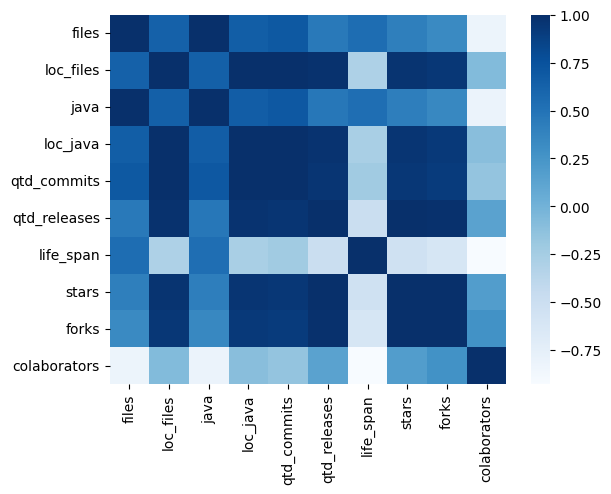

In [52]:
import seaborn as sns

# calculate the correlation matrix on the numeric columns
corr = df_temp1.select_dtypes('number').corr()

sns.heatmap(corr, cmap='Blues')

# 4. Critical files (Parcial) - ATDCodeAnalyzer

Ainda não foram selecionados os Architectural Smells e Design Smells

## ActiveMQ

In [53]:
df_critial_files_parcial_activemq = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/piloto/main/criticos/activemq/activemq_arquivos_criticos.csv')
df_critial_files_parcial_activemq

,nome,amloc,foc
0,BrokerService.java,292,8
1,DemandForwardingBridgeSupport.java,300,8
2,MessageDatabase.java,170,10
3,Queue.java,72,9
4,TopicSubscription.java,103,9
5,TransportConnector.java,80,10


![Critial Files ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/scatter/activemq_scatter_plot_foc_amloc_only_java_com_quadrantes.png "Critical Files ActiveMQ - Parcial").

![Boxplot AMLOC ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/boxplot/activemq_accumulated_modified_locs_boxplot_java_files_valid.png "Boxplot AMLOC ActiveMQ")

![Boxplot FOC ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/boxplot/activemq_boxplot_frequencia_commmits_only_java.png "Boxplot FOC ActiveMQ")

![Boxplot CC ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/boxplot/activemq_boxplot_complexidade_ciclomatica_only_java.png "Boxplot CC ActiveMQ")

![]()

## Guava

Ainda não foram selecionados os Architectural Smells e Design Smells

In [56]:
df_critical_files_guava = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/piloto/main/criticos/guava/guava_arquivos_criticos.csv')
df_critical_files_guava.head(90)

,nome,amloc,foc
0,AbstractBiMap.java,306,16
1,AbstractExecutionThreadService.java,207,13
2,AbstractFuture.java,1038,55
3,AbstractIdleService.java,117,13
4,AbstractScheduledService.java,650,25
...,...,...,...
85,TypeToken.java,237,20
86,Types.java,133,14
87,Uninterruptibles.java,285,17
88,ValueGraphBuilder.java,130,20


![Scatter plot AMOLC x FOC](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/scatter/guava_scatter_plot_foc_amloc_only_java_com_quadrantes.png "Scatter plot AMOLC x FOC")

![Boxplot AMLOC Guava](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/boxplot/guava_accumulated_modified_locs_boxplot_java_files.png "Boxplot AMLOC Guava")

![Boxplot FOC Guava](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/boxplot/guava_boxplot_frequencia_commmits_only_java.png "Boxplot FOC Guava")

![Boxplot CC Guava](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/boxplot/guava_boxplot_complexidade_ciclomatica_only_java.png "Boxplot CC Guava")

# 5. Critical Files (parcial) - SAS2022